# Exploratory Data Analysis: ROI for Budget

### Libraries to import:

In [230]:
import pandas as pd
import seaborn as sns
sns.set_palette("muted")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Concatenate Scraped Movie Data by Decade:

In [231]:
sixties = pd.read_csv('zippedData/1960_1970.csv')

In [232]:
seventies = pd.read_csv('zippedData/1971_1980.csv')

In [233]:
eighties = pd.read_csv('zippedData/1981_1990.csv')

In [234]:
nineties = pd.read_csv('zippedData/1991_2000.csv')

In [235]:
aughts = pd.read_csv('zippedData/2001_2010.csv')

In [236]:
teens = pd.read_csv('zippedData/2011_2020.csv')

In [237]:
combined = sixties.append([seventies, eighties, nineties, aughts, teens])
combined

,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947","$32,000,000",NaN,8.5,"580,863"
1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,"$2,000,000",NaN,NaN,7.7,"85,315"
2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000","$1,836,351",NaN,7.9,"120,895"
3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000","$177,066",NaN,8.3,"157,134"
4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,"$1,818,688",NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...
2995,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
2996,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
2997,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
2998,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83


### Examine DataFrame and Preliminary Cleaning:

In [238]:
combined.shape

(18300, 10)

In [239]:
combined.columns

Index(['url', 'title', 'year', 'genre', 'gross_usa', 'budget',
       'worldwide_gross', 'pg_rated', 'rating', 'rating_pop'],
      dtype='object')

In [240]:
combined.reset_index(inplace=True)

In [241]:
combined = combined.drop('index', axis=1)

In [242]:
combined

,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947","$32,000,000",NaN,8.5,"580,863"
1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,"$2,000,000",NaN,NaN,7.7,"85,315"
2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000","$1,836,351",NaN,7.9,"120,895"
3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000","$177,066",NaN,8.3,"157,134"
4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,"$1,818,688",NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...
18295,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
18296,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
18297,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
18298,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83


### Data Cleaning:

#### Check for Missing Values:

In [243]:
combined.isnull().sum()

url                    0
title                  0
year                   0
genre                  5
gross_usa           8893
budget              9547
worldwide_gross     8212
pg_rated           11061
rating               117
rating_pop           117
dtype: int64

#### Remove Dollar Signs and Commas from Currency Columns:

In [244]:
combined['worldwide_gross'] = combined['worldwide_gross'].str.strip('$')
combined['worldwide_gross'] = combined['worldwide_gross'].str.replace(',', '')

combined['budget'] = combined['budget'].str.strip('$')
combined['budget'] = combined['budget'].str.replace(',', '')

combined['gross_usa'] = combined['gross_usa'].str.strip('$')
combined['gross_usa'] = combined['gross_usa'].str.replace(',', '')

#### Remove Non-USD Reported Earnings:

In [245]:
combined = combined[~combined['budget'].astype(str).str.startswith('SEK')]
combined = combined[~combined['budget'].astype(str).str.startswith('NOK')]
combined = combined[~combined['budget'].astype(str).str.startswith('KRW')]
combined = combined[~combined['budget'].astype(str).str.startswith('SGD')]
combined = combined[~combined['budget'].astype(str).str.startswith('THB')]
combined = combined[~combined['budget'].astype(str).str.startswith('JPY')]
combined = combined[~combined['budget'].astype(str).str.startswith('HUF')]
combined = combined[~combined['budget'].astype(str).str.startswith('INR')]
combined = combined[~combined['budget'].astype(str).str.startswith('GBP')]
combined = combined[~combined['budget'].astype(str).str.startswith('HKD')]
combined = combined[~combined['budget'].astype(str).str.startswith('FRF')]
combined = combined[~combined['budget'].astype(str).str.startswith('EUR')]
combined = combined[~combined['budget'].astype(str).str.startswith('FIM')]
combined = combined[~combined['budget'].astype(str).str.startswith('DEM')]
combined = combined[~combined['budget'].astype(str).str.startswith('DKK')]
combined = combined[~combined['budget'].astype(str).str.startswith('CAD')]
combined = combined[~combined['budget'].astype(str).str.startswith('ESP')]
combined = combined[~combined['budget'].astype(str).str.startswith('AUD')]
combined = combined[~combined['budget'].astype(str).str.startswith('BEF')]
combined = combined[~combined['budget'].astype(str).str.startswith('CNY')]
combined = combined[~combined['budget'].astype(str).str.startswith('ATS')]
combined = combined[~combined['budget'].astype(str).str.startswith('BRL')]

In [246]:
combined

,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']",32000000,806947,32000000,NaN,8.5,"580,863"
1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,2000000,NaN,NaN,7.7,"85,315"
2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...",1830650,12000000,1836351,NaN,7.9,"120,895"
3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,3000000,177066,NaN,8.3,"157,134"
4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,1818688,NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...
18295,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
18296,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
18297,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
18298,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83


#### Remove Rows with Missing Data: 

We need intact budget and worldwide gross earnings for each movie so we need to remove rows with missing values in these columns. This will decrease the size of the dataframe, but, in this case, it is necessary. 

In [247]:
pared_down = combined.dropna()
pared_down

,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
1202,https://www.imdb.com/title/tt0057012/,Dr. Strangelove or: How I Learned to Stop Worr...,1964,['Comedy'],9440272,1800000,9443876,PG,8.4,"437,986"
1205,https://www.imdb.com/title/tt0058461/,A Fistful of Dollars,1964,"['Action', 'Drama', 'Western']",14500000,200000,14516248,R,8.0,"190,339"
1238,https://www.imdb.com/title/tt0057877/,Becket,1964,"['Biography', 'Drama', 'History']",149327,3000000,149327,PG-13,7.8,"13,272"
1502,https://www.imdb.com/title/tt0059113/,Doctor Zhivago,1965,"['Drama', 'Romance', 'War']",111721910,11000000,111918564,PG-13,8.0,"67,790"
1558,https://www.imdb.com/title/tt0059418/,Major Dundee,1965,"['Adventure', 'War', 'Western']",20807,3800000,20807,PG-13,6.7,"6,864"
...,...,...,...,...,...,...,...,...,...,...
18099,https://www.imdb.com/title/tt9173418/,Brahms: The Boy II,2020,"['Drama', 'Horror', 'Mystery', 'Thriller']",12611536,10000000,20311536,PG-13,4.6,"7,432"
18127,https://www.imdb.com/title/tt7545266/,Like a Boss,2020,['Comedy'],22169514,29000000,29753143,R,4.4,"6,756"
18130,https://www.imdb.com/title/tt7510346/,The Turning,2020,"['Drama', 'Horror', 'Mystery']",15472775,14000000,18592707,PG-13,3.8,"6,813"
18136,https://www.imdb.com/title/tt9208444/,Impractical Jokers: The Movie,2020,['Comedy'],10691091,3000000,10691091,PG-13,6.0,"3,694"


#### Recast Budget and Worldwide Gross as Int64: 

This throws a warning because we are altering a copy of a dataframe. In this case, it is what we want so don't mind the warning, the change will go through.

In [248]:
pared_down['budget'] = pared_down.budget.astype('int64')

/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [249]:
pared_down['worldwide_gross'] = pared_down.worldwide_gross.astype('int64')

/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [250]:
pared_down.budget.dtype

dtype('int64')

In [251]:
pared_down.worldwide_gross.dtype

dtype('int64')

In [252]:
pared_down.budget.sort_values()

11436         6000
9672          7000
13262         7000
10425        15000
14150        15000
           ...    
17111    300000000
14113    300000000
17122    317000000
17401    321000000
17706    356000000
Name: budget, Length: 4616, dtype: int64

### Data Visualization:

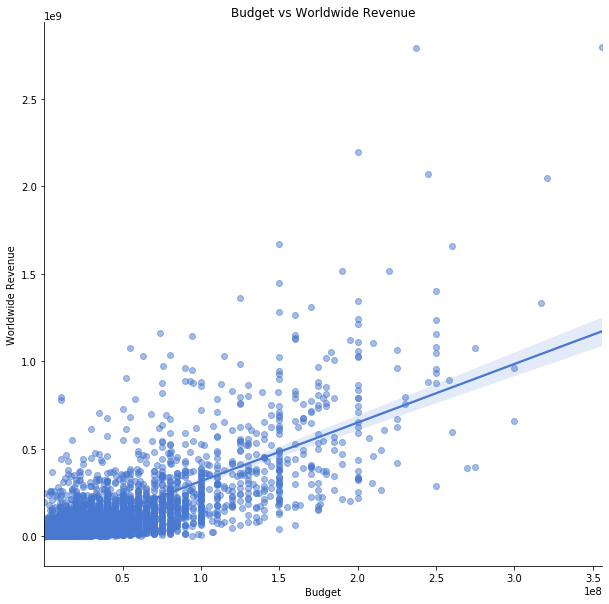

In [259]:
plt.figure(figsize=(10, 10))
sns.regplot(x = 'budget', y = 'worldwide_gross', data = pared_down, scatter_kws={'alpha':0.5})
plt.title('Budget vs Worldwide Revenue')
plt.xlabel('Budget')
plt.ylabel('Worldwide Revenue')
sns.despine()

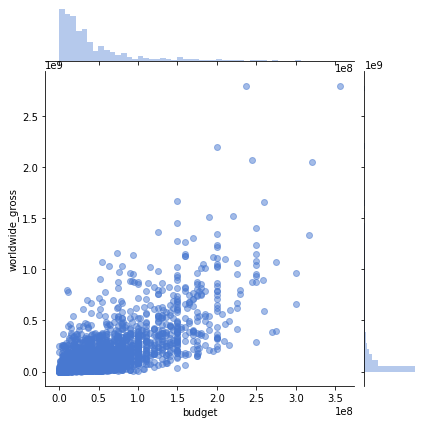

In [261]:
sns.jointplot(x = 'budget', y = 'worldwide_gross', data = pared_down, alpha = 0.5)

### Insights: